# Netflix Content Analysis - Part 2: Exploratory Data Analysis (EDA)
## Comprehensive Data Visualization and Analysis


**Objective:** Perform comprehensive EDA on the cleaned Netflix dataset with detailed visualizations.

---

## 1. Import Libraries

In [ ]:

!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("All libraries imported successfully")
print("Visualization settings configured")

All libraries imported successfully
Visualization settings configured


## 2. Load Cleaned Dataset

In [ ]:
# Load the cleaned dataset from previous notebook
df = pd.read_csv('netflix_cleaned.csv')

print(" Cleaned dataset loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df):,}")

# Display first few rows
df.head()

 Cleaned dataset loaded successfully
Dataset shape: (8807, 17)
Total records: 8,807


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,decade,age,age_category,combined_features
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,2020,4,Recent,Documentaries As her father nears the end of h...
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2020,3,Recent,"International TV Shows, TV Dramas, TV Mysterie..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2020,3,Recent,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2020,3,Recent,"Docuseries, Reality TV Feuds, flirtations and ..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2020,3,Recent,"International TV Shows, Romantic TV Shows, TV ..."


## 3. Basic Statistics and Overview

In [ ]:
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\n Basic Statistics:")
print(f"   Total Content: {len(df):,}")
print(f"   Movies: {len(df[df['type'] == 'Movie']):,}")
print(f"   TV Shows: {len(df[df['type'] == 'TV Show']):,}")
print(f"   Year Range: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"   Countries: {df['country'].nunique()}")
print(f"   Directors: {df['director'].nunique()}")
print(f"   Unique Ratings: {df['rating'].nunique()}")

DATASET OVERVIEW

 Basic Statistics:
   Total Content: 8,807
   Movies: 6,131
   TV Shows: 2,676
   Year Range: 1925 - 2021
   Countries: 749
   Directors: 4529
   Unique Ratings: 18


### 3.1 Top Genres Analysis

In [ ]:
print(" Top 15 Genres/Categories:")
print("=" * 60)

# Extract all genres
all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([genre.strip() for genre in genres.split(',')])

genre_counts = Counter(all_genres)
top_genres_df = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Count'])
print(top_genres_df.to_string(index=False))

 Top 15 Genres/Categories:
                   Genre  Count
    International Movies   2752
                  Dramas   2427
                Comedies   1674
  International TV Shows   1351
           Documentaries    869
      Action & Adventure    859
               TV Dramas    763
      Independent Movies    756
Children & Family Movies    641
         Romantic Movies    616
             TV Comedies    581
               Thrillers    577
          Crime TV Shows    470
                Kids' TV    451
              Docuseries    395


### 3.2 Top Countries

In [ ]:
print(" Top 10 Countries:")
print("=" * 60)

country_counts = df[df['country'] != 'Unknown Country']['country'].value_counts().head(10)
top_countries_df = pd.DataFrame({
    'Country': country_counts.index,
    'Titles': country_counts.values
})
print(top_countries_df.to_string(index=False))

 Top 10 Countries:
       Country  Titles
 United States    2818
         India     972
United Kingdom     419
         Japan     245
   South Korea     199
        Canada     181
         Spain     145
        France     124
        Mexico     110
         Egypt     106


### 3.3 Rating Distribution

In [ ]:
print(" Rating Distribution:")
print("=" * 60)

rating_counts = df['rating'].value_counts()
for rating, count in rating_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {rating}: {count} titles ({percentage:.1f}%)")

 Rating Distribution:
   TV-MA: 3207 titles (36.4%)
   TV-14: 2160 titles (24.5%)
   TV-PG: 863 titles (9.8%)
   R: 799 titles (9.1%)
   PG-13: 490 titles (5.6%)
   TV-Y7: 334 titles (3.8%)
   TV-Y: 307 titles (3.5%)
   PG: 287 titles (3.3%)
   TV-G: 220 titles (2.5%)
   NR: 80 titles (0.9%)
   G: 41 titles (0.5%)
   TV-Y7-FV: 6 titles (0.1%)
   Not Rated: 4 titles (0.0%)
   NC-17: 3 titles (0.0%)
   UR: 3 titles (0.0%)
   66 min: 1 titles (0.0%)
   74 min: 1 titles (0.0%)
   84 min: 1 titles (0.0%)


### 3.4 Duration Analysis

In [ ]:
print(" Duration Analysis:")
print("=" * 60)

movies_duration = df[df['type'] == 'Movie']['duration_value'].dropna()
tv_seasons = df[df['type'] == 'TV Show']['duration_value'].dropna()

if len(movies_duration) > 0:
    print(f"\nMovies:")
    print(f"   Average Duration: {movies_duration.mean():.0f} minutes")
    print(f"   Median Duration: {movies_duration.median():.0f} minutes")
    print(f"   Range: {movies_duration.min():.0f} - {movies_duration.max():.0f} minutes")

if len(tv_seasons) > 0:
    print(f"\nTV Shows:")
    print(f"   Average Seasons: {tv_seasons.mean():.1f}")
    print(f"   Median Seasons: {tv_seasons.median():.1f}")
    print(f"   Range: {tv_seasons.min():.0f} - {tv_seasons.max():.0f} seasons")

 Duration Analysis:

Movies:
   Average Duration: 100 minutes
   Median Duration: 98 minutes
   Range: 3 - 312 minutes

TV Shows:
   Average Seasons: 1.8
   Median Seasons: 1.0
   Range: 1 - 17 seasons


## 4. Visualizations

### 4.1 Content Type and Temporal Analysis

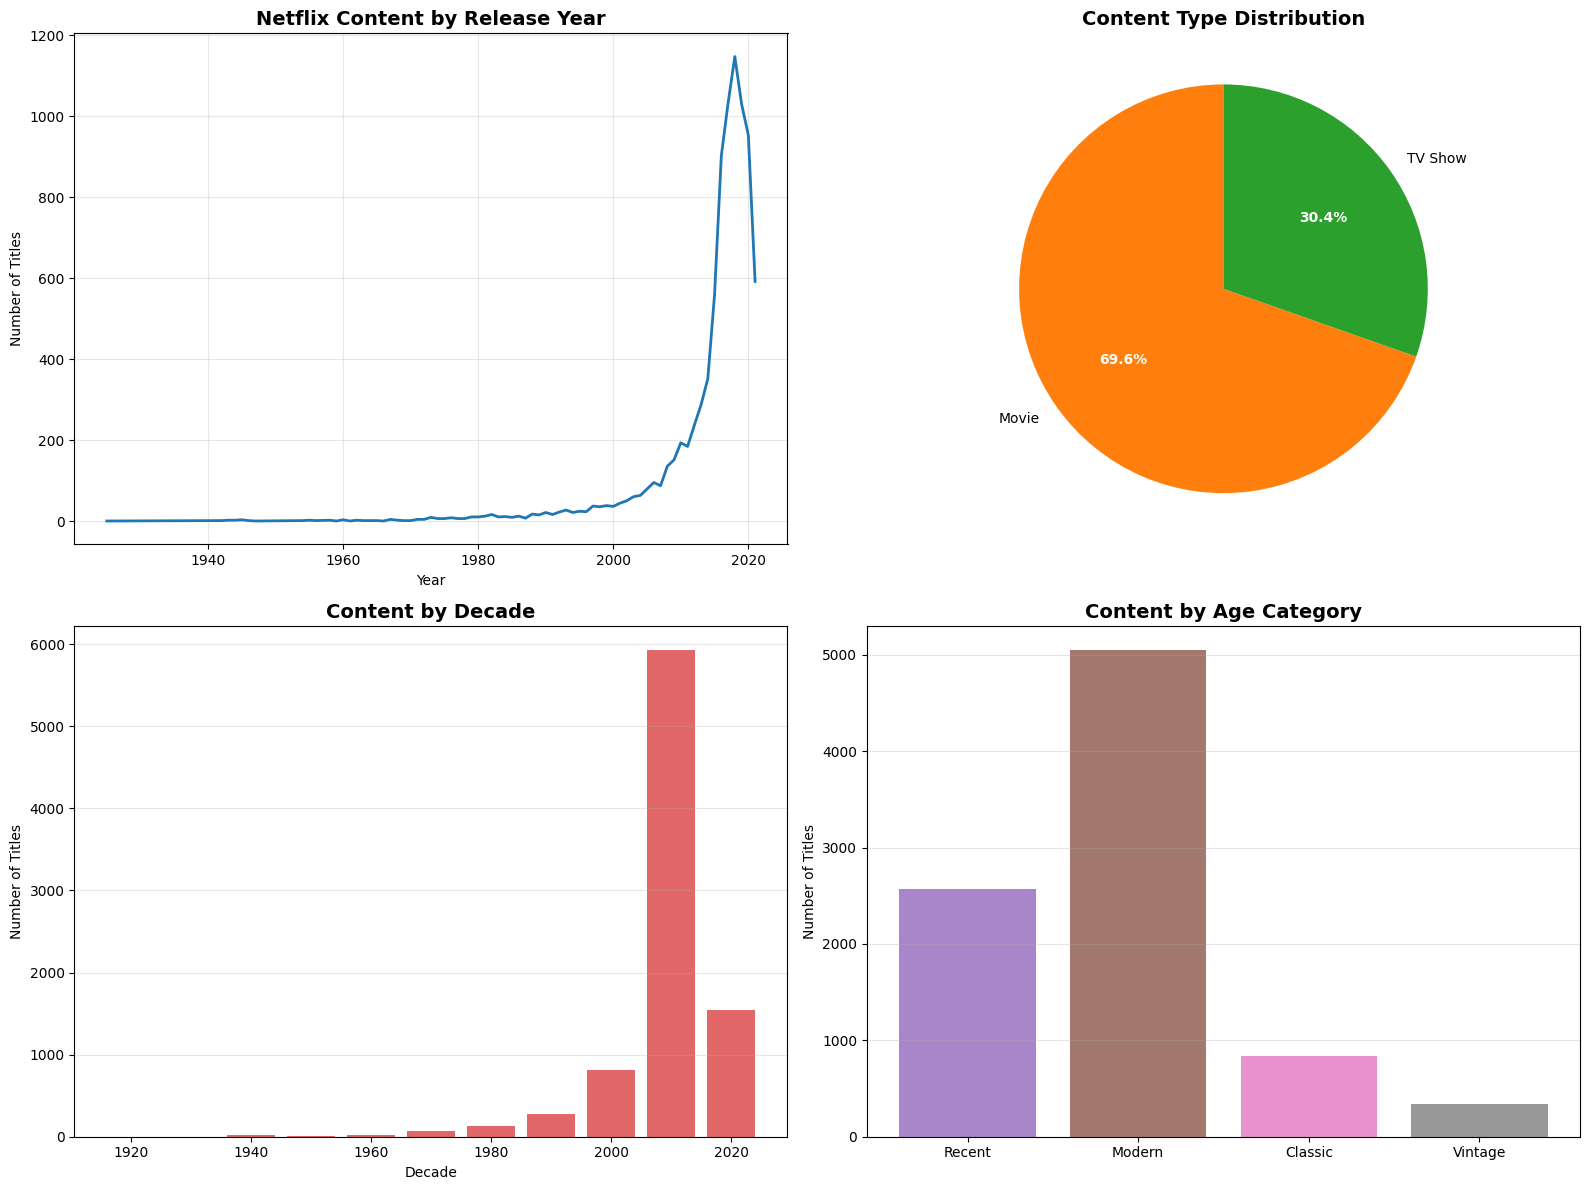

 Temporal analysis visualization saved as 'eda_temporal_analysis.png'


In [ ]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Content by release year
ax1 = axes[0, 0]
year_counts = df['release_year'].value_counts().sort_index()
ax1.plot(year_counts.index, year_counts.values, linewidth=2, color='#1f77b4')
ax1.set_title('Netflix Content by Release Year', fontweight='bold', fontsize=14)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Titles')
ax1.grid(True, alpha=0.3)

# 2. Content type distribution
ax2 = axes[0, 1]
type_counts = df['type'].value_counts()
colors = ['#ff7f0e', '#2ca02c']
wedges, texts, autotexts = ax2.pie(type_counts.values, labels=type_counts.index,
                                   autopct='%1.1f%%', colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Content Type Distribution', fontweight='bold', fontsize=14)

# 3. Content by decade
ax3 = axes[1, 0]
decade_counts = df['decade'].value_counts().sort_index()
ax3.bar(decade_counts.index, decade_counts.values, color='#d62728', alpha=0.7, width=8)
ax3.set_title('Content by Decade', fontweight='bold', fontsize=14)
ax3.set_xlabel('Decade')
ax3.set_ylabel('Number of Titles')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Content age categories
ax4 = axes[1, 1]
age_counts = df['age_category'].value_counts()
age_order = ['Recent', 'Modern', 'Classic', 'Vintage']
age_counts = age_counts.reindex(age_order)
bars = ax4.bar(range(len(age_counts)), age_counts.values,
               color=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'], alpha=0.8)
ax4.set_xticks(range(len(age_counts)))
ax4.set_xticklabels(age_counts.index, rotation=0)
ax4.set_title('Content by Age Category', fontweight='bold', fontsize=14)
ax4.set_ylabel('Number of Titles')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('eda_temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Temporal analysis visualization saved as 'eda_temporal_analysis.png'")

### 4.2 Genre and Rating Analysis

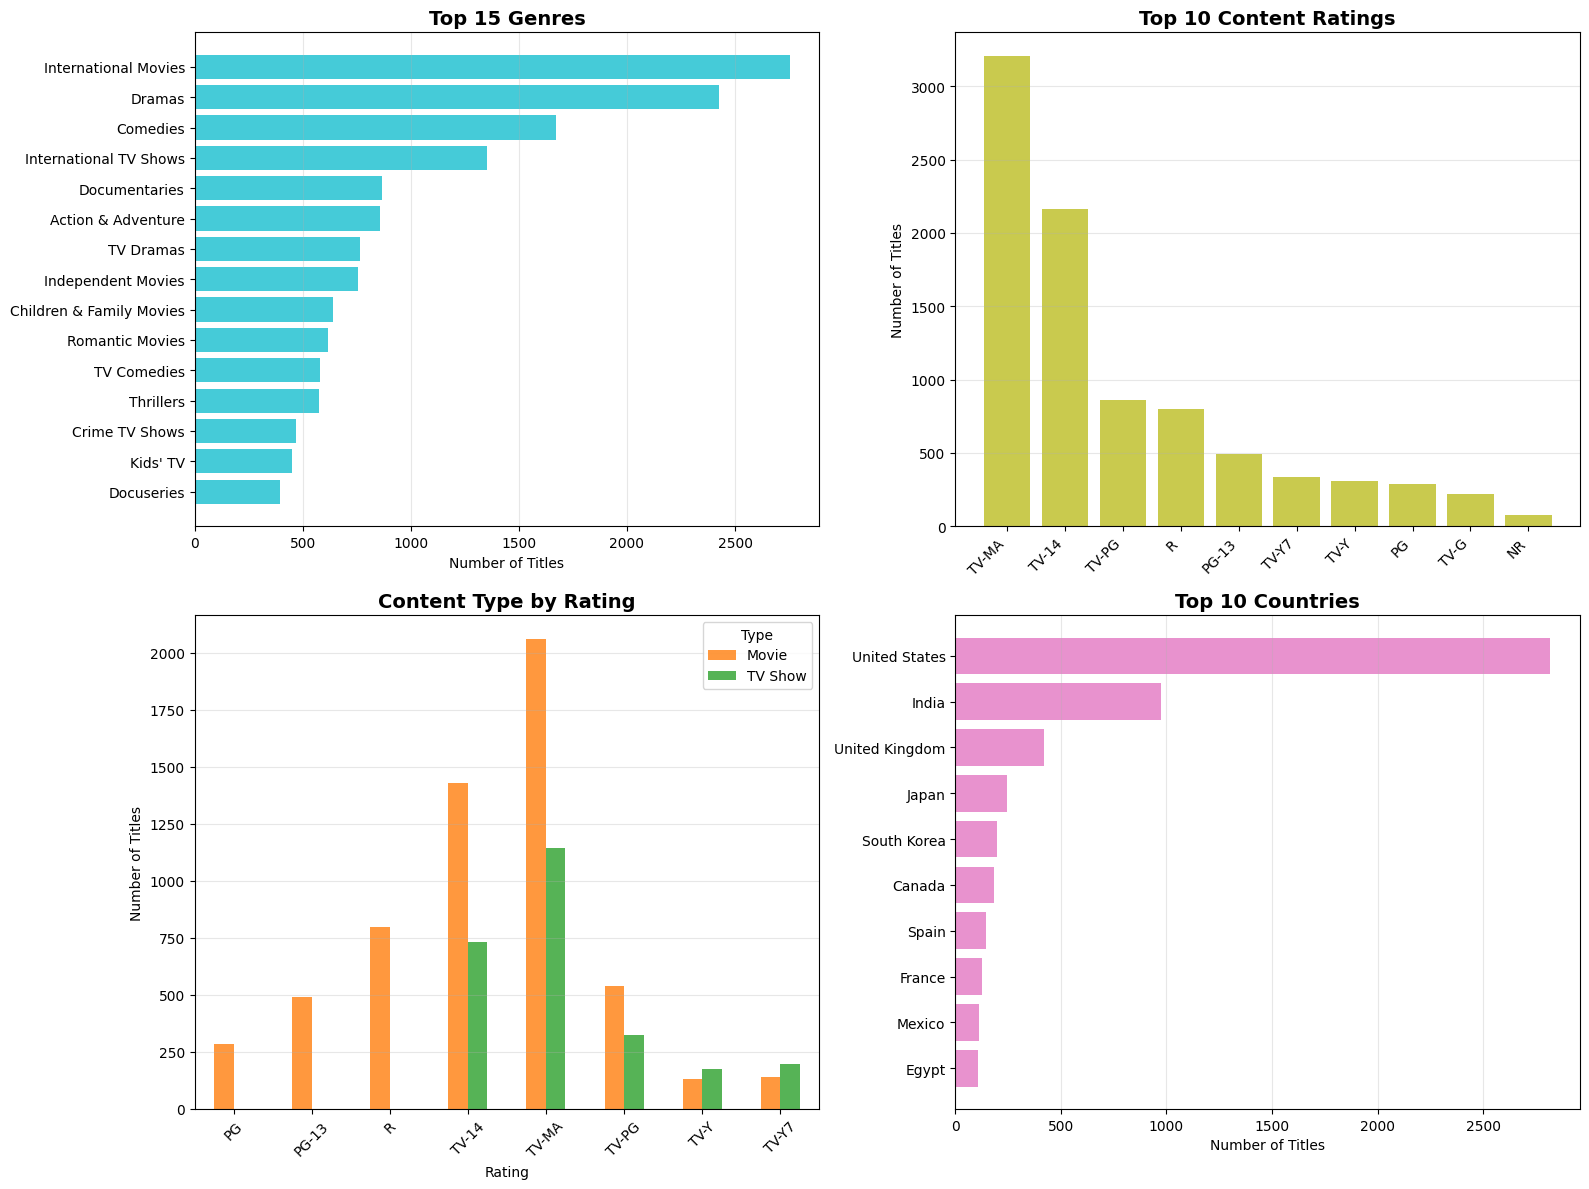

Genre and rating analysis saved as 'eda_genre_rating_analysis.png'


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 genres
ax1 = axes[0, 0]
genre_df = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Count'])
ax1.barh(range(len(genre_df)), genre_df['Count'], color='#17becf', alpha=0.8)
ax1.set_yticks(range(len(genre_df)))
ax1.set_yticklabels(genre_df['Genre'])
ax1.invert_yaxis()
ax1.set_xlabel('Number of Titles')
ax1.set_title('Top 15 Genres', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3, axis='x')

# 2. Rating distribution
ax2 = axes[0, 1]
rating_data = df['rating'].value_counts().head(10)
ax2.bar(range(len(rating_data)), rating_data.values, color='#bcbd22', alpha=0.8)
ax2.set_xticks(range(len(rating_data)))
ax2.set_xticklabels(rating_data.index, rotation=45, ha='right')
ax2.set_ylabel('Number of Titles')
ax2.set_title('Top 10 Content Ratings', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Content type by rating
ax3 = axes[1, 0]
top_ratings = df['rating'].value_counts().head(8).index
rating_type_data = df[df['rating'].isin(top_ratings)].groupby(['rating', 'type']).size().unstack(fill_value=0)
rating_type_data.plot(kind='bar', ax=ax3, color=['#ff7f0e', '#2ca02c'], alpha=0.8)
ax3.set_title('Content Type by Rating', fontweight='bold', fontsize=14)
ax3.set_xlabel('Rating')
ax3.set_ylabel('Number of Titles')
ax3.legend(title='Type')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Top 10 countries
ax4 = axes[1, 1]
top_countries = df[df['country'] != 'Unknown Country']['country'].value_counts().head(10)
ax4.barh(range(len(top_countries)), top_countries.values, color='#e377c2', alpha=0.8)
ax4.set_yticks(range(len(top_countries)))
ax4.set_yticklabels(top_countries.index)
ax4.invert_yaxis()
ax4.set_xlabel('Number of Titles')
ax4.set_title('Top 10 Countries', fontweight='bold', fontsize=14)
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('eda_genre_rating_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Genre and rating analysis saved as 'eda_genre_rating_analysis.png'")

### 4.3 Duration Analysis Visualizations

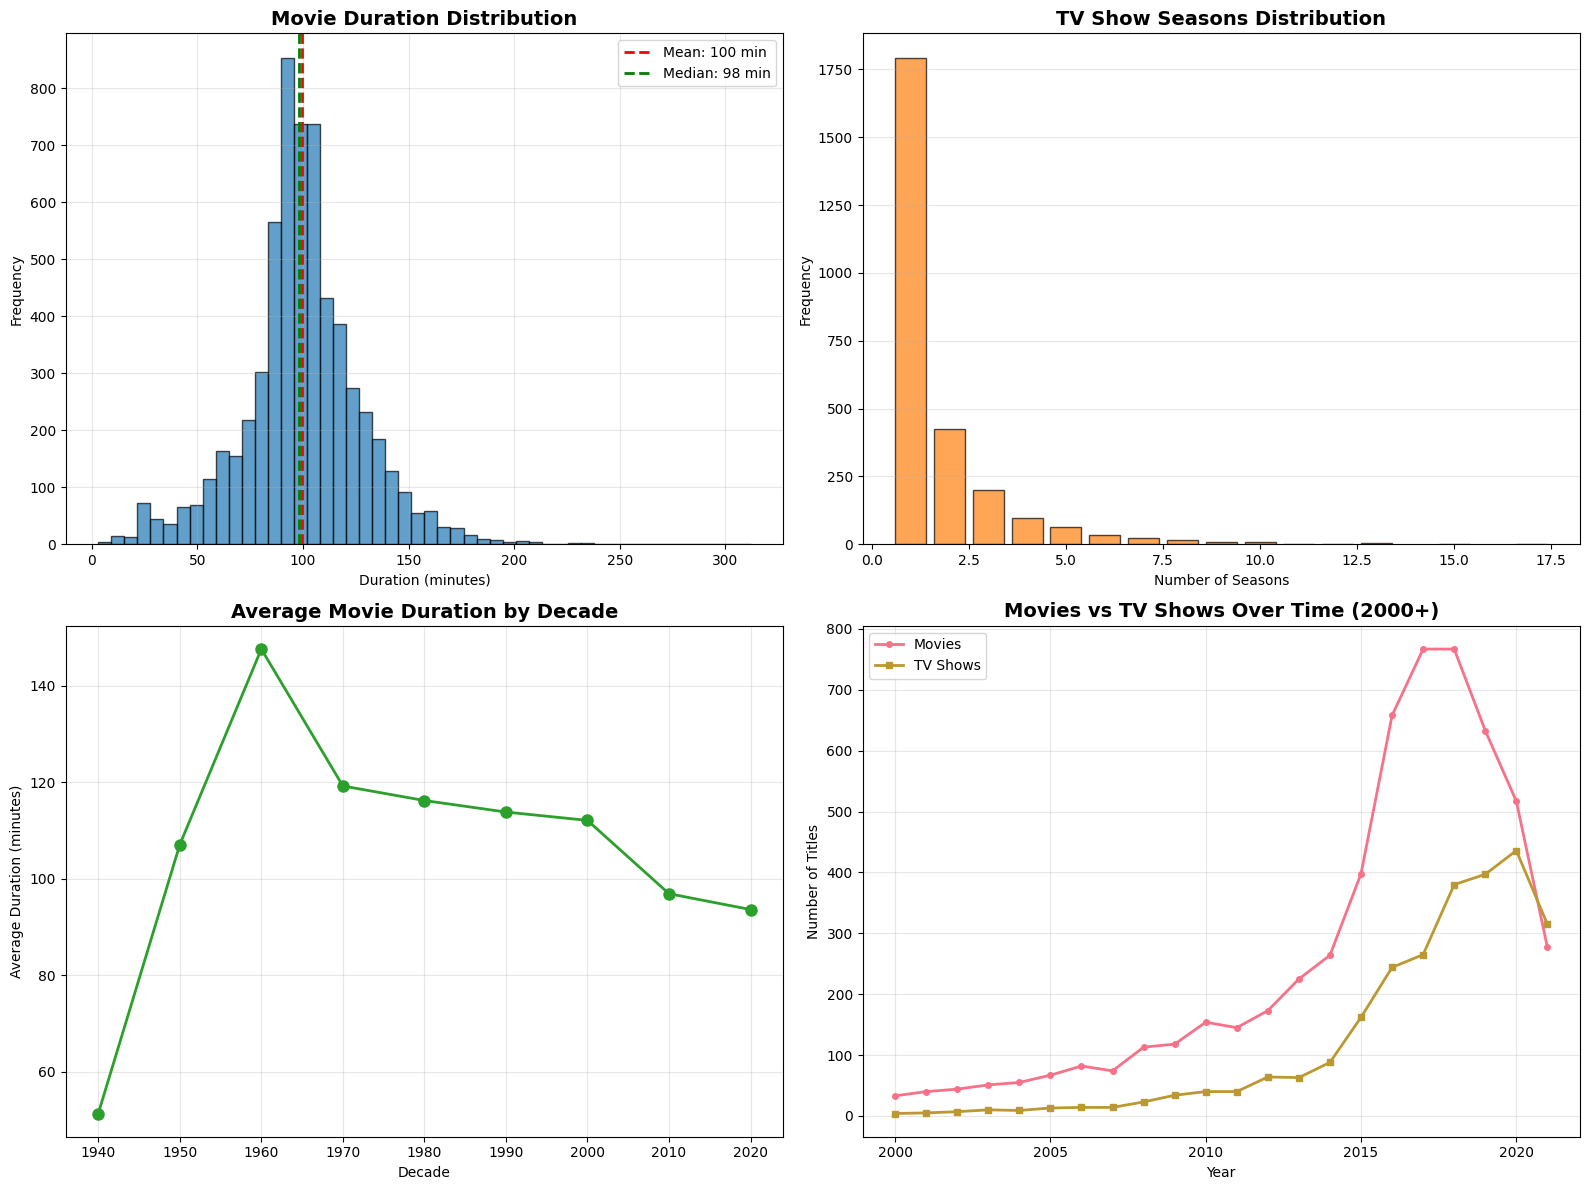

 Duration analysis saved as 'eda_duration_analysis.png'


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Movie duration distribution
ax1 = axes[0, 0]
movies_duration = df[df['type'] == 'Movie']['duration_value'].dropna()
ax1.hist(movies_duration, bins=50, color='#1f77b4', alpha=0.7, edgecolor='black')
ax1.axvline(movies_duration.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {movies_duration.mean():.0f} min')
ax1.axvline(movies_duration.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {movies_duration.median():.0f} min')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('Movie Duration Distribution', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. TV show seasons distribution
ax2 = axes[0, 1]
tv_seasons = df[df['type'] == 'TV Show']['duration_value'].dropna()
season_counts = tv_seasons.value_counts().sort_index()
ax2.bar(season_counts.index, season_counts.values, color='#ff7f0e', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Number of Seasons')
ax2.set_ylabel('Frequency')
ax2.set_title('TV Show Seasons Distribution', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Movie duration by decade
ax3 = axes[1, 0]
movie_decade_duration = df[df['type'] == 'Movie'].groupby('decade')['duration_value'].mean().dropna()
ax3.plot(movie_decade_duration.index, movie_decade_duration.values, marker='o', linewidth=2, markersize=8, color='#2ca02c')
ax3.set_xlabel('Decade')
ax3.set_ylabel('Average Duration (minutes)')
ax3.set_title('Average Movie Duration by Decade', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3)

# 4. Content releases over time (Movies vs TV Shows)
ax4 = axes[1, 1]
yearly_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
yearly_type = yearly_type[yearly_type.index >= 2000]  # Focus on 2000 onwards
ax4.plot(yearly_type.index, yearly_type['Movie'], label='Movies', linewidth=2, marker='o', markersize=4)
ax4.plot(yearly_type.index, yearly_type['TV Show'], label='TV Shows', linewidth=2, marker='s', markersize=4)
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of Titles')
ax4.set_title('Movies vs TV Shows Over Time (2000+)', fontweight='bold', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_duration_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Duration analysis saved as 'eda_duration_analysis.png'")

### 4.4 Advanced Analytics - Correlation and Patterns

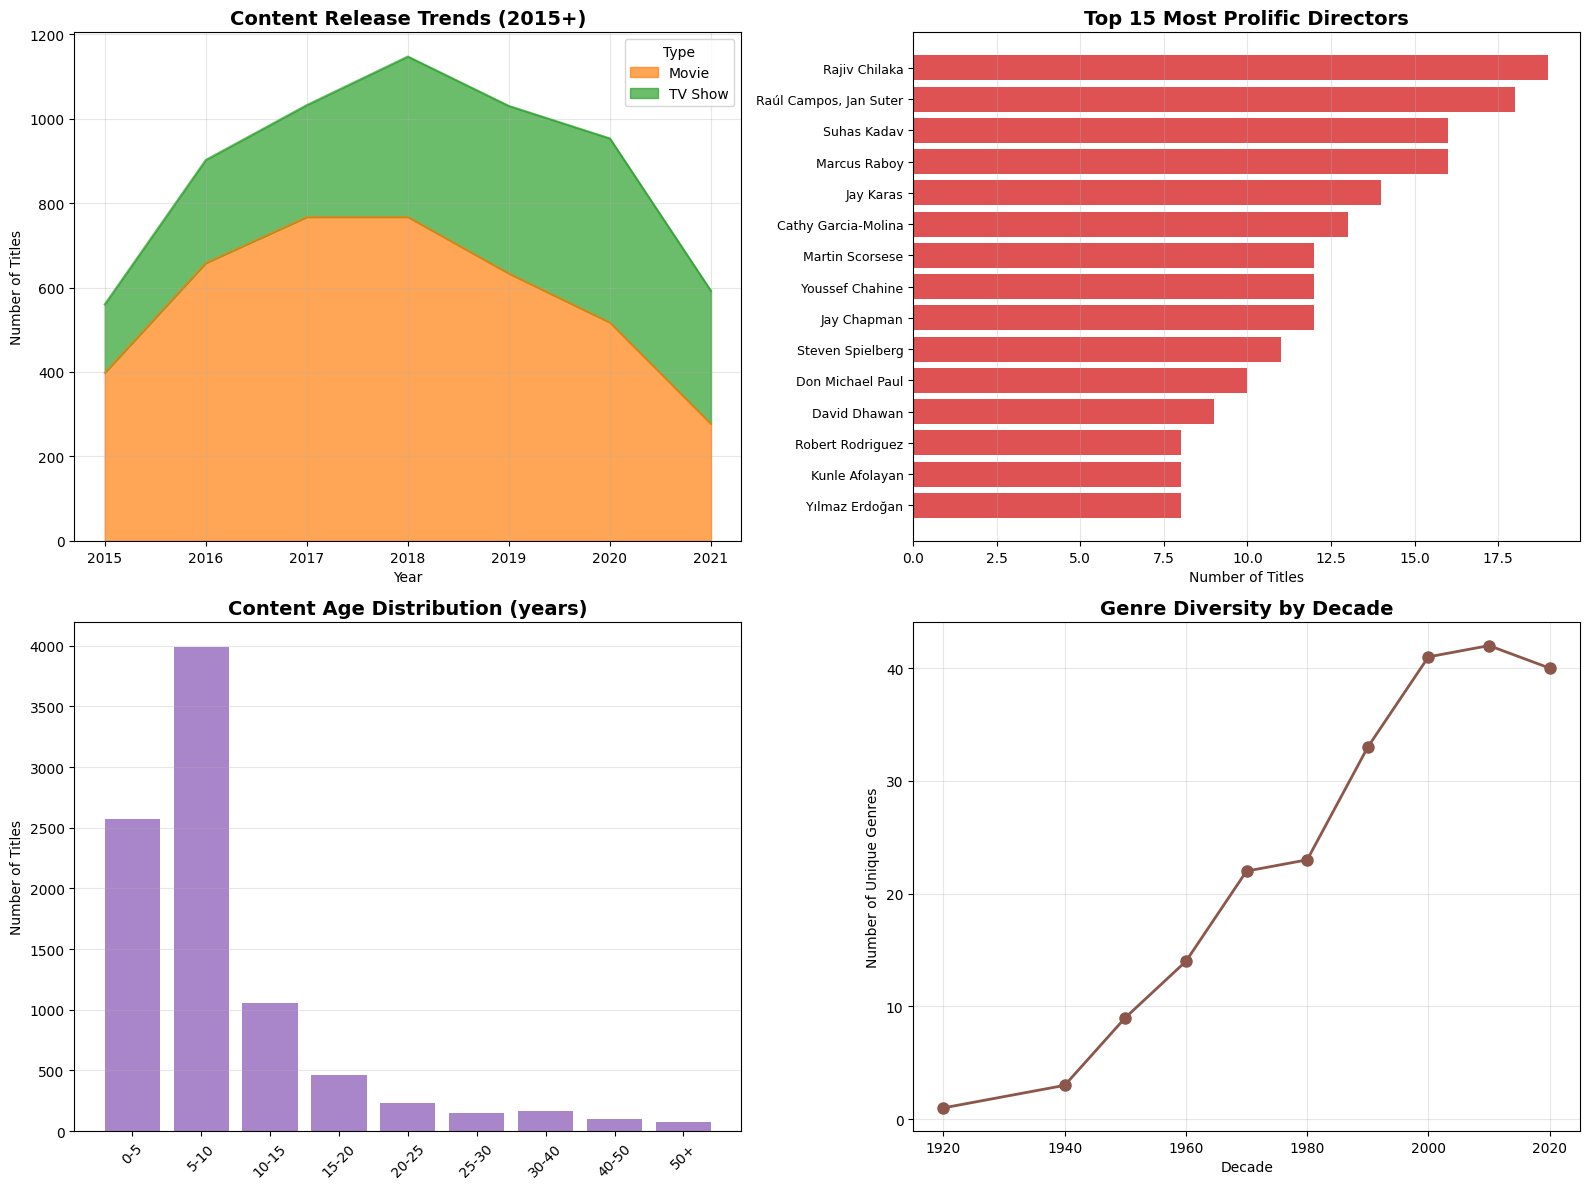

Advanced analytics saved as 'eda_advanced_analytics.png'


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Release year trends by content type
ax1 = axes[0, 0]
recent_df = df[df['release_year'] >= 2015]
year_type_counts = recent_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
year_type_counts.plot(kind='area', ax=ax1, alpha=0.7, color=['#ff7f0e', '#2ca02c'])
ax1.set_title('Content Release Trends (2015+)', fontweight='bold', fontsize=14)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Titles')
ax1.legend(title='Type')
ax1.grid(True, alpha=0.3)

# 2. Top directors (by number of titles)
ax2 = axes[0, 1]
top_directors = df[df['director'] != 'Unknown Director']['director'].value_counts().head(15)
ax2.barh(range(len(top_directors)), top_directors.values, color='#d62728', alpha=0.8)
ax2.set_yticks(range(len(top_directors)))
ax2.set_yticklabels(top_directors.index, fontsize=9)
ax2.invert_yaxis()
ax2.set_xlabel('Number of Titles')
ax2.set_title('Top 15 Most Prolific Directors', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')

# 3. Content age distribution
ax3 = axes[1, 0]
age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 100]
age_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-40', '40-50', '50+']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_bin_counts = df['age_bin'].value_counts().sort_index()
ax3.bar(range(len(age_bin_counts)), age_bin_counts.values, color='#9467bd', alpha=0.8)
ax3.set_xticks(range(len(age_bin_counts)))
ax3.set_xticklabels(age_bin_counts.index, rotation=45)
ax3.set_ylabel('Number of Titles')
ax3.set_title('Content Age Distribution (years)', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Genre diversity over decades
ax4 = axes[1, 1]
decade_genre_counts = df.groupby('decade')['listed_in'].apply(
    lambda x: len(set([g.strip() for genres in x for g in genres.split(',')])))
ax4.plot(decade_genre_counts.index, decade_genre_counts.values, marker='o', linewidth=2,
         markersize=8, color='#8c564b')
ax4.set_xlabel('Decade')
ax4.set_ylabel('Number of Unique Genres')
ax4.set_title('Genre Diversity by Decade', fontweight='bold', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_advanced_analytics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Advanced analytics saved as 'eda_advanced_analytics.png'")

## 5. Key Insights Summary

In [ ]:
print("\n" + "="*70)
print(" KEY INSIGHTS FROM EDA")
print("="*70)

# Content composition
movie_pct = (len(df[df['type'] == 'Movie']) / len(df)) * 100
tv_pct = (len(df[df['type'] == 'TV Show']) / len(df)) * 100
print(f"\n1. Content Composition:")
print(f"   - Movies: {movie_pct:.1f}% of total content")
print(f"   - TV Shows: {tv_pct:.1f}% of total content")

# Temporal insights
recent_content = len(df[df['release_year'] >= 2015])
recent_pct = (recent_content / len(df)) * 100
print(f"\n2. Temporal Insights:")
print(f"   - {recent_pct:.1f}% of content released after 2015")
print(f"   - Most active decade: {df['decade'].mode()[0]}s")

# Genre insights
top_genre = genre_counts.most_common(1)[0]
print(f"\n3. Genre Insights:")
print(f"   - Most popular genre: {top_genre[0]} ({top_genre[1]} titles)")
print(f"   - Total unique genres: {len(genre_counts)}")

# Duration insights
print(f"\n4. Duration Insights:")
print(f"   - Average movie duration: {movies_duration.mean():.0f} minutes")
print(f"   - Most common TV show length: {tv_seasons.mode()[0]:.0f} season(s)")

# Geographic insights
top_country = df[df['country'] != 'Unknown Country']['country'].value_counts().iloc[0]
print(f"\n5. Geographic Insights:")
print(f"   - Top producing country: {df['country'].value_counts().index[0]}")
print(f"   - Total countries represented: {df['country'].nunique()}")

# Rating insights
top_rating = df['rating'].value_counts().index[0]
print(f"\n6. Rating Insights:")
print(f"   - Most common rating: {top_rating}")
print(f"   - Total unique ratings: {df['rating'].nunique()}")

print("\n" + "="*70)
print("EDA completed successfully")
print("All visualizations saved")
print("Ready for ML modeling")
print("="*70)


 KEY INSIGHTS FROM EDA

1. Content Composition:
   - Movies: 69.6% of total content
   - TV Shows: 30.4% of total content

2. Temporal Insights:
   - 70.6% of content released after 2015
   - Most active decade: 2010s

3. Genre Insights:
   - Most popular genre: International Movies (2752 titles)
   - Total unique genres: 42

4. Duration Insights:
   - Average movie duration: 100 minutes
   - Most common TV show length: 1 season(s)

5. Geographic Insights:
   - Top producing country: United States
   - Total countries represented: 749

6. Rating Insights:
   - Most common rating: TV-MA
   - Total unique ratings: 18

EDA completed successfully
All visualizations saved
Ready for ML modeling


## 6. Export Summary Statistics

In [ ]:
# Create summary statistics DataFrame
summary_stats = {
    'Metric': [
        'Total Titles',
        'Movies',
        'TV Shows',
        'Earliest Year',
        'Latest Year',
        'Unique Countries',
        'Unique Directors',
        'Unique Genres',
        'Avg Movie Duration (min)',
        'Avg TV Seasons'
    ],
    'Value': [
        len(df),
        len(df[df['type'] == 'Movie']),
        len(df[df['type'] == 'TV Show']),
        df['release_year'].min(),
        df['release_year'].max(),
        df['country'].nunique(),
        df['director'].nunique(),
        len(genre_counts),
        f"{movies_duration.mean():.0f}",
        f"{tv_seasons.mean():.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('eda_summary_statistics.csv', index=False)

print("Summary statistics saved")
print("\nSummary:")
print(summary_df.to_string(index=False))

Summary statistics saved

Summary:
                  Metric Value
            Total Titles  8807
                  Movies  6131
                TV Shows  2676
           Earliest Year  1925
             Latest Year  2021
        Unique Countries   749
        Unique Directors  4529
           Unique Genres    42
Avg Movie Duration (min)   100
          Avg TV Seasons   1.8
